# Evaluation metrics for Multi-class classification problems

We can easily extend our knowledge about [evaluation metrics for Binary classification problems](1_Binary_Classification_Evaluation_Metrics.ipynb) we learnt already, which were:
+ Accuracy score
+ Precision
+ Recall
+ AUC
+ Log loss

First, what is **Multi-class classification** problems?  
In Binary classification problems, we were classifying a sample into 2 classes (Pneumothorax or non-Pneumothorax, etc.). Here, we'll classify a given sample out of more than 2 classes. For example, in IRIS dataset, we need to classify a sample out of 3 species, namely Setosa, Versicolour and Virginica.

**What are the different Evaluation metrics for these type of problems?**  
Let me tell you that the concepts like Precision, Recall, etc. remains same and we just use them and compute average or weighted average, etc. So, following are the metrics for Precision:
+ Macro averaged precision
+ Micro averaged precision
+ Weighted precision

Similar concepts are present for Recall, F1-Score, etc.

Let's deep-dive into Precision related evaluation metrics.

## Macro averaged precision

It is defined as compute precision for all classes individually and then average them.  
This can be better understand in the code.

In [1]:
import numpy as np
from eval_metrics import * # Python file that stores all functions created in Binary_Classification Notebook

In [2]:
def macro_averaged_precision(y_true, y_pred):
    """
    Compute the Macro averaged precision for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns macro-averaged precision for given values.
    """
    
    # Get number of classes in y_true
    classes = list(np.unique(y_true))
    
    precision = 0
    
    for class_ in classes:
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp/(tp+fp)
        precision += temp_precision
    
    precision /= len(classes)
    return precision

## Micro averaged precision

It is defined as calculate classwise TP and FP and then use that to calculate overall precision.

In [3]:
def micro_averaged_precision(y_true, y_pred):
    """
    Compute the Micro averaged precision for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns micro-averaged precision for given values.
    """
    
    classes = list(np.unique(y_true))
    
    tp = 0
    fp = 0
    
    for class_ in classes:
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        temp_tp = true_positive(temp_true, temp_pred)
        temp_fp = false_positive(temp_true, temp_pred)
        
        tp += temp_tp
        fp += temp_fp
    
    return tp / (tp + fp)

## Weighted precision

It is defined same as macro but in this case, it is weighted average depending on the number of items in each class.

In [4]:
from collections import Counter

In [5]:
def weighted_averaged_precision(y_true, y_pred):
    """
    Compute the Weighted averaged precision for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns weighted-averaged precision for given values.
    """
    
    cnt_classes = Counter(y_true)
    
    precision = 0
    
    for class_, cnt in cnt_classes.items():
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)
        
        precision += temp_precision * cnt
    
    return precision / len(y_true)

Let's compare our implementations with `sklearn` package results

In [6]:
targets = [0, 1, 2, 0, 1, 2, 0, 2, 2]
preds   = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(f'Macro    Precision: {macro_averaged_precision(targets, preds)}')
print(f'Micro    Precision: {micro_averaged_precision(targets, preds)}')
print(f'Weighted Precision: {weighted_averaged_precision(targets, preds)}')

Macro    Precision: 0.3611111111111111
Micro    Precision: 0.4444444444444444
Weighted Precision: 0.39814814814814814


In [7]:
from sklearn.metrics import precision_score

print(f'Macro    Precision: {precision_score(targets, preds, average="macro")}')
print(f'Micro    Precision: {precision_score(targets, preds, average="micro")}')
print(f'Weighted Precision: {precision_score(targets, preds, average="weighted")}')

Macro    Precision: 0.3611111111111111
Micro    Precision: 0.4444444444444444
Weighted Precision: 0.39814814814814814


Great!
Let's define functions for Multi-class Recall.

## Macro-averaged Recall

It is defined as the overall average of recalls computed for each class.

In [8]:
def macro_averaged_recall(y_true, y_pred):
    """
    Compute the Macro averaged recall for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns macro-averaged recall for given values.
    """
    
    classes = list(np.unique(y_true))
    recall = 0.0
    for class_ in classes:
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        
        temp_recall = tp/(tp+fn)
        recall += temp_recall
    
    return recall/len(classes)

## Micro-averaged Recall

It is defined as the computed recall for overall TP and FN for all classes.

In [9]:
def micro_averaged_recall(y_true, y_pred):
    """
    Compute the Micro averaged recall for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns micro-averaged recall for given values.
    """
    
    classes = list(np.unique(y_true))
    
    tp = 0.0
    fn = 0.0
    for class_ in classes:
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        tp += true_positive(temp_true, temp_pred)
        fn += false_negative(temp_true, temp_pred)
    
    return tp/(tp+fn)

## Weighted-averaged Recall

It is same as Macro-averaged recall, but the average is weighted as per items in each class.

In [10]:
def weighted_averaged_recall(y_true, y_pred):
    """
    Compute the Weighted averaged recall for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns weighted-averaged recall for given values.
    """
    
    classes_cnt = Counter(y_true)
    
    recall = 0.0
    for class_, cnt in classes_cnt.items():
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        
        temp_recall = tp/(tp+fn)
        recall += temp_recall * cnt
    return recall/len(y_true)

Let's compare our implementation with `sklearn` package.

In [11]:
targets = [0, 1, 2, 0, 1, 2, 0, 2, 2]
preds   = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(f'Macro    Recall: {macro_averaged_recall(targets, preds)}')
print(f'Micro    Recall: {micro_averaged_recall(targets, preds)}')
print(f'Weighted Recall: {weighted_averaged_recall(targets, preds)}')

Macro    Recall: 0.4166666666666667
Micro    Recall: 0.4444444444444444
Weighted Recall: 0.4444444444444444


In [12]:
from sklearn.metrics import recall_score

print(f'Macro    Recall: {recall_score(targets, preds, average="macro")}')
print(f'Micro    Recall: {recall_score(targets, preds, average="micro")}')
print(f'Weighted Recall: {recall_score(targets, preds, average="weighted")}')

Macro    Recall: 0.4166666666666667
Micro    Recall: 0.4444444444444444
Weighted Recall: 0.4444444444444444


Good job! We've got same results from package implementation as with our own implementations.

Next is F1-score for multi-class classification

## Macro-averaged F1 score

It is defined as the overall average of all computed F1-score for each class.

In [13]:
def macro_averaged_f1_score(y_true, y_pred):
    """
    Compute the Macro averaged F1-score for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns macro-averaged F1-score for given values.
    """
    
    classes = list(np.unique(y_true))
    
    f1_score = 0.0
    
    for class_ in classes:
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        precision_ = precision(temp_true, temp_pred)
        recall_ = recall(temp_true, temp_pred)
        
        try:
            temp_f1 = (2*precision_*recall_) / (precision_ + recall_)
            f1_score += temp_f1
        except ZeroDivisionError:
            pass
        
    return f1_score/len(classes)

## Micro-averaged F1-score

It is defined as the overall F1-score for all classes precision and recall.

In [14]:
def micro_averaged_f1_score(y_true, y_pred):
    """
    Compute the Micro averaged F1-score for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns micro-averaged F1-score for given values.
    """
    
    precision_ = micro_averaged_precision(y_true, y_pred)
    recall_ = micro_averaged_recall(y_true, y_pred)
    
    return (2*precision_*recall_) / (precision_ + recall_)

## Weighted-averaged F1-score

It is same as Macro-averaged F1-score but with the weighted average as items in each class.

In [15]:
def weighted_f1_score(y_true, y_pred):
    """
    Compute the Weighted averaged F1-score for Multi-class classification problem.
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns weighted-averaged F1-score for given values.
    """
    
    classes_cnt = Counter(y_true)
    
    f1_score = 0.0
    for class_, cnt in classes_cnt.items():
        temp_true = [1 if yt == class_ else 0 for yt in y_true]
        temp_pred = [1 if yp == class_ else 0 for yp in y_pred]
        
        precision_ = precision(temp_true, temp_pred)
        recall_ = recall(temp_true, temp_pred)
        
        try:
            temp_f1_score = (2*precision_*recall_) / (precision_ + recall_)
            f1_score += temp_f1_score*cnt
        except ZeroDivisionError:
            pass
    return f1_score / len(y_true)

Let's compare with `sklearn` package implementations.

In [16]:
targets = [0, 1, 2, 0, 1, 2, 0, 2, 2]
preds   = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(f'Macro    F1-score: {macro_averaged_f1_score(targets, preds)}')
print(f'Micro    F1-score: {micro_averaged_f1_score(targets, preds)}')
print(f'Weighted F1-score: {weighted_f1_score(targets, preds)}')

Macro    F1-score: 0.38095238095238093
Micro    F1-score: 0.4444444444444444
Weighted F1-score: 0.41269841269841273


In [17]:
from sklearn.metrics import f1_score

print(f'Macro    F1-score: {f1_score(targets, preds, average="macro")}')
print(f'Micro    F1-score: {f1_score(targets, preds, average="micro")}')
print(f'Weighted F1-score: {f1_score(targets, preds, average="weighted")}')

Macro    F1-score: 0.38095238095238093
Micro    F1-score: 0.4444444444444444
Weighted F1-score: 0.41269841269841273


## Confusion matrix

It helps us to see how many samples were misclassified and how many were classified correctly.

Let's take a look at how confusion matrix looks like to understand it correctly.

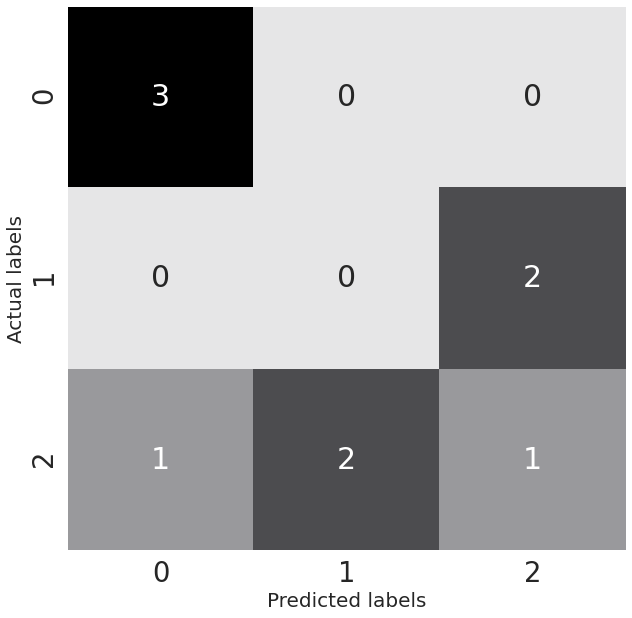

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

targets = [0, 1, 2, 0, 1, 2, 0, 2, 2]
preds   = [0, 2, 1, 0, 2, 1, 0, 0, 2]

conf_mat = confusion_matrix(targets, preds)

plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(conf_mat, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual labels', fontsize=20)
plt.xlabel('Predicted labels', fontsize=20)
plt.show()

As we can see above, that 
+ Label '0' was correctly predicted all times.
+ Label '1' was misclassified as '2'
+ Label '2' was classified correctly only for 1 sample and misclassified for 3 samples.

As we can understand better by looking at above confusion matrix that our model hasn't predicted correctly. Visually looking at results in confusion matrix is easy as compared to different metrics.

In binary classification, where we have only 2 classes, we get confusion matrix of size 2x2. 'Main diagonal' i.e. top-left to bottom-right elements contains True Positive (TP) and True Negative (TN). Other elements are False Positive (FP) and False Negative (FN). Having these we can quickly calculate `Precision`, `Recall`, and other metrics.

*Note: FP is also known as `Type-I error` and FN is known as `Type-II error`*